In [1]:
# import the wrapper
from Leaf import *

In [ ]:
# The wrapper can be either initialized by a parameter file (legacy) 
# or given the parameters directly as dict (recommended).
# Parameters not given are automatically set to default

# An initialization of the wrapper may look like this (remove anything not needed)

# set a path where the data will be saved
data_path = "./data/" # <- don't forget the "/" at the end
# set a prefix for the saved files
data_prefix = "run_" # results in files run_{run_id}.h5 e.g. run_0.h5, run_1.h5, ...
# set a path for the cache, if None, write no cache (short: leave it None; Long: caching is minimal faster but will spam your disk with unnecessary stuff - it's not worth it, trust me.)
cache_path = None

# see what is required for the Leaf class
Leaf?
# One can always use this if a function or method is unknown

In [2]:
# Ok, let's make a simulation of a comoving box.
# Initialize the simulator (Leaf class) either by passing a path as the argument parameter_path
# or initialize it via dicts as shown below

# define hyperparameter of the simulation
user_parameter = {
    "HII_DIM": 70,
    "BOX_LEN": 200,
    "N_THREADS": 2,
    "USE_INTERPOLATION_TABLES": True,
    "PERTURB_ON_HIGH_RES": False
}
flag_options = {
    "INHOMO_RECO": False,
    "USE_TS_FLUCT": False
}

astro_params = {
    "INHOMO_RECO": False
}

redshift = 5.5

# define saving behavoir 
data_path = "./data/"
data_prefix = "run_" # results in files like run_0, run_1, ...
cache = None

# initialize the simulation class
sim = Leaf(user_params=user_parameter, flag_options=flag_options, astro_params=astro_params, debug=True, redshift=redshift,
           data_path=data_path, data_prefix=data_prefix, cache_path=cache)
# The Leaf class is responsible of holding all fixed parameter which does not change over multiple runs (e.g. HII_DIM, INHOMO_RECO, ...) BUT they can be changed later if needed.

Set initial parameters...


In [ ]:
# To just run a single box using the parameters above one can just 
# the bool argument save determines if the result will be returned or saved on disk
box = sim.run_box(save=False)

# one could also pass different arguments for the specific run
# e.g. one is interested in how the box may look like if
astro_params = {
    "L_X": 41
}

box_different_L_X = sim.run_box(save=False, astro_params=astro_params)

In [ ]:
# To simulate a lightcone, one can do
lc = sim.run_lightcone(save=False)
# The parametes for the run_lightcone method are the same as for the run_box
# except:
# There is also a sanity check (5 sigma from the Planack observation) activatable by filter_peculiar (off by default)
# And a sanity check to get rid of NaNs (which may occur) via NN interpolation by activating sanity_check (on by default) when initializing the Leaf class

In [14]:
# One can also run the simulator on a prior distributior
# This is useful to create a database
# For cluster deployment, change the threads argument to the number of available cpu cores

# we first need to define parameter ranges for the parameters of interest
# e.g. we are interested in the HII_EFF_FACTOR and OMm

astro_params_range = {
    "HII_EFF_FACTOR": [20,40]
}

cosmo_params_range = {
    "OMm": [0.1,0.3]
}

# we also need to define a samplefunction. The arrays of the ranges are the parameters passed to this samplefunction
# Currently there are 3 functions implemented: uniform, gauss, gumble
# We can define the samplefunction to be uniform by e.g. (or define any custom function)
from time import time
times = []

# don't forget to add when running with more than 1 thread (multiprocessing may cause problems in jupyter notebooks)
if __name__ == '__main__':
    for threads in [1,3,5,7,9]:
        start = time()
        # Ok, let's make a simulation of a comoving box.
        # Initialize the simulator (Leaf class) either by passing a path as the argument parameter_path
        # or initialize it via dicts as shown below

        # define hyperparameter of the simulation
        user_parameter = {
            "HII_DIM": 70,
            "BOX_LEN": 200,
            "N_THREADS": 1,
            "USE_INTERPOLATION_TABLES": False,
            "PERTURB_ON_HIGH_RES": False
        }
        flag_options = {
            "INHOMO_RECO": True,
            "USE_TS_FLUCT": True
        }

        astro_params = {
            "INHOMO_RECO": True
        }

        astro_params_range = {
            "HII_EFF_FACTOR": uniform(*[20,40])
        }

        cosmo_params_range = {
            "OMm": uniform(*[0.1,0.3])
        }


        redshift = 5.5

        # define saving behavoir 
        data_path = "./data/"
        data_prefix = "run_" # results in files like run_0, run_1, ...
        cache = None

        # initialize the simulation class
        sim = Leaf(user_params=user_parameter, flag_options=flag_options, astro_params=astro_params, debug=True, redshift=redshift,
                data_path=data_path, data_prefix=data_prefix, cache_path=cache)
        
        # The Leaf class is responsible of holding all fixed parameter which does not change over multiple runs (e.g. HII_DIM, INHOMO_RECO, ...) BUT they can be changed later if needed.
        sim.run_lcsampling(save=False, threads=threads, quantity=9, astro_params_range=astro_params_range,
                        cosmo_params_range=cosmo_params_range)
        end = time()
        times.append(end-start)

Set initial parameters...
Parameters:
[{'redshift': 5.5, 'save': False, 'random_seed': None, 'sanity_check': True, 'filter_peculiar': False, 'astro_params': {'HII_EFF_FACTOR': 22.534070309601745}, 'cosmo_params': {'OMm': 0.2671013538093885}, 'user_params': {}, 'flag_options': {}, 'global_params': {}, 'run_id': 0, 'fields': ['brightness_temp', 'density', 'xH_box']}, {'redshift': 5.5, 'save': False, 'random_seed': None, 'sanity_check': True, 'filter_peculiar': False, 'astro_params': {'HII_EFF_FACTOR': 21.421808752117673}, 'cosmo_params': {'OMm': 0.22285474638836544}, 'user_params': {}, 'flag_options': {}, 'global_params': {}, 'run_id': 1, 'fields': ['brightness_temp', 'density', 'xH_box']}, {'redshift': 5.5, 'save': False, 'random_seed': None, 'sanity_check': True, 'filter_peculiar': False, 'astro_params': {'HII_EFF_FACTOR': 30.445226442071554}, 'cosmo_params': {'OMm': 0.2383142548772271}, 'user_params': {}, 'flag_options': {}, 'global_params': {}, 'run_id': 2, 'fields': ['brightness_tem

In [15]:
times

[10.484493970870972,
 8.237992763519287,
 8.214633226394653,
 8.270925521850586,
 8.343273639678955]

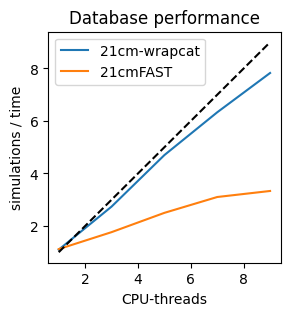

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

threads = np.array([1,3,5,7,9])
wrapper = np.array([8.20435380935669,
 3.287615966796875,
 1.9144806385040283,
 1.4215354442596436,
 1.1497005939483643])
sim = np.array([8.0435380935669,
 5.1,
 3.6,
 2.9,
 2.7])
plt.figure(figsize=(3,3))
plt.plot(threads, 9/wrapper,label="21cm-wrapcat")
plt.plot(threads, 9/sim, label="21cmFAST")
plt.plot(threads,threads, c="black", ls="--", label="Optimum")
plt.legend()
plt.title("Database performance")
plt.ylabel("simulations / time")
plt.xlabel("CPU-threads")
plt.savefig("blub.png", dpi=400)

# A full pipeline may look like this

from Leaf import *
cosmo_params = {
"OMm": 0.2
}
astro_params = {
"L_X": 40,
"NU_X_THRESH": 100,
"ION_Tvir_MIN": 4.5,
"HII_EFF_FACTOR": 29,
"INHOMO_RECO": True
}
global_params = {
    "M_WDM": 4
}
user_params = {
"HII_DIM": 40,
"BOX_LEN": 160,
"N_THREADS": 8,
"USE_INTERPOLATION_TABLES": True,
"PERTURB_ON_HIGH_RES": True
}

flag_options = {
"INHOMO_RECO": True,
"USE_TS_FLUCT": True
}

redshift = 5.5

data_path = "./data/"
data_prefix = "run_" # results in files like run_0, run_1, ...
cache_path = None

sim = Leaf(debug=True, cosmo_params=cosmo_params,
           astro_params=astro_params,
           global_params=global_params,
           user_params=user_params,
           flag_options=flag_options,
           redshift=redshift,
           data_path=data_path,
           data_prefix=data_prefix,
           cache_path=cache_path)

astro_params_range = {
    "HII_EFF_FACTOR": [20,40]
}

cosmo_params_range = {
    "OMm": [0.1,0.3]
}


'''
testsim = sim.run_lightcone(save=False, redshift=5., filter_peculiar=False,
                            cosmo_params=cosmo_params, astro_params=astro_params,
                            global_params=global_params, user_params=user_params,
                            flag_options=flag_options)
'''


if __name__ == '__main__':
    sim.run_lcsampling(samplef=sim.uniform, threads=1, quantity=4,
                    astro_params_range=astro_params_range)

Don't forget to check the docs or type e.g. sim.run_lcsampling? if you feel lost.